In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
enrollment=pd.read_excel("Marshall_Course_Enrollment_1516_1617.xlsx")

In [37]:
enrollment.head()

,Course,Course Prefix,Course Suffix,Department,First Begin Time,First Days,First End Time,First Instructor,First Instructor UID,First Room,...,Second Begin Time,Second Days,Second End Time,Second Instructor,Second Instructor UID,Second Room,Section,Session,Term,Title
0,ACCT-370,ACCT,370,ACCT,10:00:00,F,11:50:00,"Hopkins, Merle, W",3.783354e+09,SLH200,...,NaN,NaN,NaN,NaN,NaN,NaN,14029,1,20153,External Financial Reporting Issues
1,ACCT-370,ACCT,370,ACCT,08:00:00,MW,09:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14025,1,20153,External Financial Reporting Issues
2,ACCT-370,ACCT,370,ACCT,10:00:00,MW,11:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14026,1,20153,External Financial Reporting Issues
3,ACCT-370,ACCT,370,ACCT,12:00:00,MW,13:50:00,"Hopkins, Merle, W",3.783354e+09,ACC303,...,NaN,NaN,NaN,NaN,NaN,NaN,14027,1,20153,External Financial Reporting Issues
4,ACCT-371,ACCT,371,ACCT,10:00:00,F,11:50:00,NaN,NaN,SLH200,...,NaN,NaN,NaN,NaN,NaN,NaN,14044,1,20153,Introduction to Accounting Systems


In [38]:
list(enrollment)

['Course',
 'Course Prefix',
 'Course Suffix',
 'Department',
 'First Begin Time',
 'First Days',
 'First End Time',
 'First Instructor',
 'First Instructor UID',
 'First Room',
 'Link',
 'Max Units',
 'Min Units',
 'Mode',
 'Reg Count',
 'Seats',
 'Second Begin Time',
 'Second Days',
 'Second End Time',
 'Second Instructor',
 'Second Instructor UID',
 'Second Room',
 'Section',
 'Session',
 'Term',
 'Title']

In [39]:
enrollment["Reg Count"].mean()

38.793032080027594

In [40]:
enrollment["Seats"].mean()

46.45843394273888

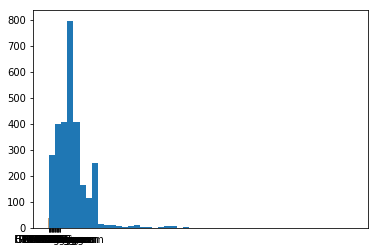

In [41]:
plt.hist(enrollment["Reg Count"],bins=50)
plt.show()

In [42]:
ratio_seat_department=pd.DataFrame(enrollment.groupby(["Department"])["Seats"].mean())

In [43]:
ratio_seat_department

,Seats
Department,
ACCT,49.090551
BAEP,47.491979
BUCO,26.570122
DSO,48.976293
EMBA Program,65.482143
FBE,58.591260
FIM Program,35.500000
FT MBA Core,75.000000
FT MBA Program,56.041667


In [44]:
ratio_reg_department=pd.DataFrame(enrollment.groupby(["Department"])["Reg Count"].mean())

In [45]:
ratio_reg_department.shape

(20, 1)

In [46]:

def seperate1(ratio):
    reg_count_department=[]
    department_name=[]
    for i in range(len(ratio)):
        st=str(ratio.iloc[i,:]).split()
        reg_count_department.append(float(st[2]))
        st2=""
        for j in range(3):
            if ((st[j+4]!="dtype:") & (st[j+4]!="float64")):
                st2=st2+" "+st[j+4]
        st2=st2.replace(",","")
        department_name.append(st2)
    return reg_count_department,department_name
    



In [47]:
reg_count_department,department_name=seperate1(ratio_reg_department)
print(reg_count_department)
print(department_name)

[39.476378, 37.786096, 24.527439, 42.077586, 57.714286, 48.650386, 35.0, 70.333333, 55.125, 8.807692, 29.117647, 53.0, 43.166667, 43.693141, 11.121622, 21.0, 41.262087, 20.428571, 55.272727, 28.851351]
[' ACCT', ' BAEP', ' BUCO', ' DSO', ' EMBA Program', ' FBE', ' FIM Program', ' FT MBA Core', ' FT MBA Program', ' G Programs', ' GEMBA Program', ' IBEAR Program', ' MBV Program', ' MKT', ' MMLIS Core', ' MMM Program', ' MOR', ' OMBA Program', ' PM MBA Program', ' UG Programs']


In [48]:

def seperate2(ratio):
    reg_count_department=[]
    department_name=[]
    for i in range(len(ratio)):
        st=str(ratio.iloc[i,:]).split()
        reg_count_department.append(float(st[1]))
        st2=""
        for j in range(3):
            if ((st[j+3]!="dtype:") & (st[j+3]!="float64")):
                st2=st2+" "+st[j+3]
        st2=st2.replace(",","")
        department_name.append(st2)
    return reg_count_department,department_name
    




In [49]:
seat_count_department,department_name=seperate2(ratio_seat_department)
print(seat_count_department)
print(department_name)

[49.090551, 47.491979, 26.570122, 48.976293, 65.482143, 58.59126, 35.5, 75.0, 56.041667, 19.75, 37.647059, 55.0, 60.666667, 50.238267, 28.513514, 31.666667, 47.053435, 24.952381, 69.545455, 39.972973]
[' ACCT', ' BAEP', ' BUCO', ' DSO', ' EMBA Program', ' FBE', ' FIM Program', ' FT MBA Core', ' FT MBA Program', ' G Programs', ' GEMBA Program', ' IBEAR Program', ' MBV Program', ' MKT', ' MMLIS Core', ' MMM Program', ' MOR', ' OMBA Program', ' PM MBA Program', ' UG Programs']


In [50]:
seat_count_department

[49.090551,
 47.491979,
 26.570122,
 48.976293,
 65.482143,
 58.59126,
 35.5,
 75.0,
 56.041667,
 19.75,
 37.647059,
 55.0,
 60.666667,
 50.238267,
 28.513514,
 31.666667,
 47.053435,
 24.952381,
 69.545455,
 39.972973]

In [51]:
department_name

[' ACCT',
 ' BAEP',
 ' BUCO',
 ' DSO',
 ' EMBA Program',
 ' FBE',
 ' FIM Program',
 ' FT MBA Core',
 ' FT MBA Program',
 ' G Programs',
 ' GEMBA Program',
 ' IBEAR Program',
 ' MBV Program',
 ' MKT',
 ' MMLIS Core',
 ' MMM Program',
 ' MOR',
 ' OMBA Program',
 ' PM MBA Program',
 ' UG Programs']

In [52]:
marshall_reg_mean=enrollment["Reg Count"].mean()
marshall_reg_mean

38.793032080027594

In [53]:
marshall_seat_mean=enrollment["Seats"].mean()
marshall_seat_mean

46.45843394273888

In [57]:
plt.bar(department_name,reg_count_department,align='center', alpha=0.5)
plt.plot(department_name,marshall_reg_mean)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

In [57]:
test={"department_name":department_name,"reg_count_department":reg_count_department,"seat_count_department":seat_count_department,"marshall_reg_mean":38.79303,"marshall_seat_mean":46.458433}

In [58]:
data=pd.DataFrame(test)
print(data.loc[:,"marshall_reg_mean"])

0     38.79303
1     38.79303
2     38.79303
3     38.79303
4     38.79303
5     38.79303
6     38.79303
7     38.79303
8     38.79303
9     38.79303
10    38.79303
11    38.79303
12    38.79303
13    38.79303
14    38.79303
15    38.79303
16    38.79303
17    38.79303
18    38.79303
19    38.79303
Name: marshall_reg_mean, dtype: float64


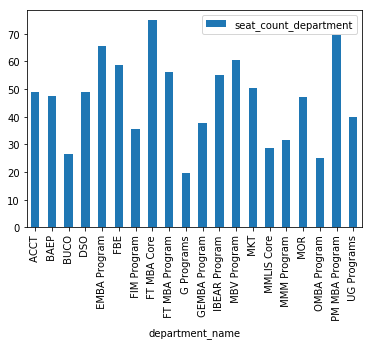

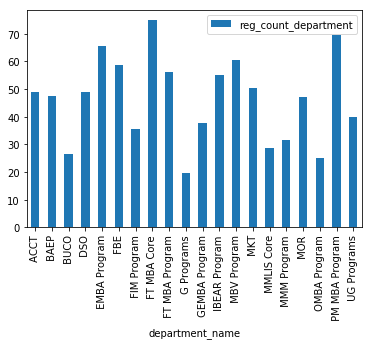

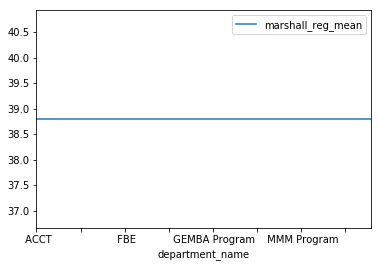

In [59]:

data.plot(x="department_name",y="seat_count_department",kind='bar')
data.plot(x="department_name",y="reg_count_department",kind='bar')
data.plot(x="department_name",y="marshall_reg_mean",kind="line")
plt.show()

In [62]:
data.to_csv("phase1.csv")